#**Task 3: Heart Disease Prediction**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

**Data Loading**

In [2]:
df = pd.read_csv('/content/heart_disease_uci.csv')

**Basic Data Exploration**

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
#make a function that shows the basic info about dataset
def basic_info(df):
  print('Info of Data: \n ', df.info())
  print('\n')
  print('Summary Statistics:\n ', df.describe())
  print('\n')
  print('Missing Values:\n ', df.isnull().sum())
  print('\n')
  print('Duplicate Values: ', df.duplicated().sum())
  print('\n')
  print('Shape of Data: ', df.shape)
  print('\n')

print('The Basic Info About Data:\n')
basic_info(df)

The Basic Info About Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Info of Data: 
  None


Summary Statistics:
                 id         age    trestbps        chol  

In [5]:
#make a function to know about uniques values for categorical columns
def unique_values(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      print(col)
      print(df[col].unique())
      print('\n')

print('Unique values of Categorical Columns:\n ')
unique_values(df)

Unique values of Categorical Columns:
 
sex
['Male' 'Female']


dataset
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


cp
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


fbs
[True False nan]


restecg
['lv hypertrophy' 'normal' 'st-t abnormality' nan]


exang
[False True nan]


slope
['downsloping' 'flat' 'upsloping' nan]


thal
['fixed defect' 'normal' 'reversable defect' nan]




In [6]:
#unique numerical column
print('Unique Numerical Column Values: ')
df['num'].unique()

Unique Numerical Column Values: 


array([0, 2, 1, 3, 4])

**Checking Missing and Duplicate Values**

In [7]:
#Filling the missing values of numerical columns
numerical_cols_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

for col in numerical_cols_with_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Missing values after median imputation:")
print(df[numerical_cols_with_missing].isnull().sum())

Missing values after median imputation:
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64


In [8]:
#Filling the missing values of categorical columns
categorical_cols_with_missing = ['cp', 'restecg', 'slope', 'thal', 'fbs', 'exang']

for col in categorical_cols_with_missing:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

print("Missing values after mode imputation:")
print(df[categorical_cols_with_missing].isnull().sum())

Missing values after mode imputation:
cp         0
restecg    0
slope      0
thal       0
fbs        0
exang      0
dtype: int64


/tmp/ipython-input-2719123788.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)


In [9]:
print("Final missing values check:")
df.isnull().sum()

Final missing values check:


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


#**Data Visualizations**

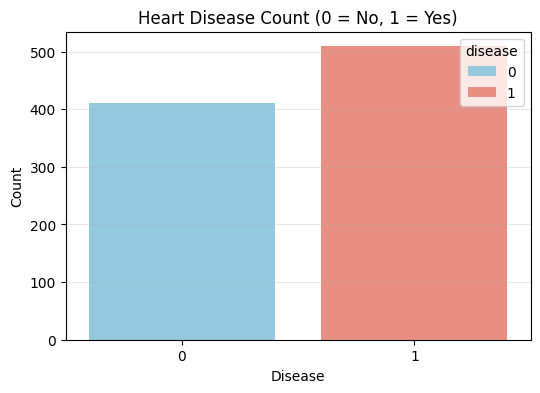

In [10]:
df['disease'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='disease', hue= 'disease', palette=['skyblue','salmon'])
plt.title("Heart Disease Count (0 = No, 1 = Yes)")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

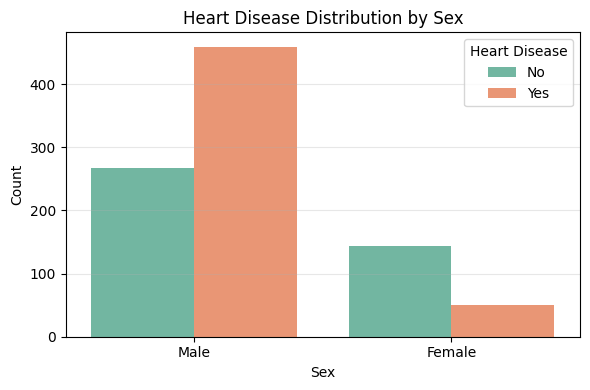

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='disease', palette='Set2')
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

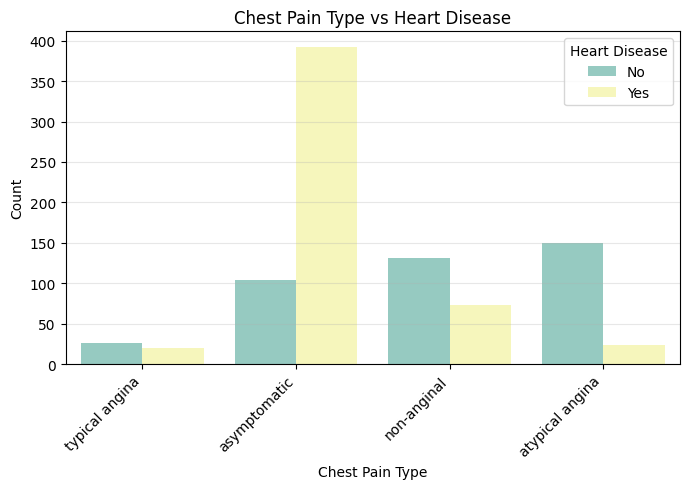

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='cp', hue='disease', palette='Set3')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

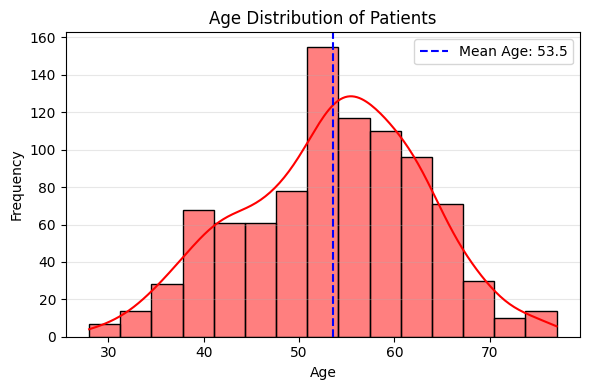

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, color='red', bins=15)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Add mean line
mean_age = df['age'].mean()
plt.axvline(mean_age, color='blue', linestyle='--', label=f'Mean Age: {mean_age:.1f}')
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2672522894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease', y='chol', palette='pastel')


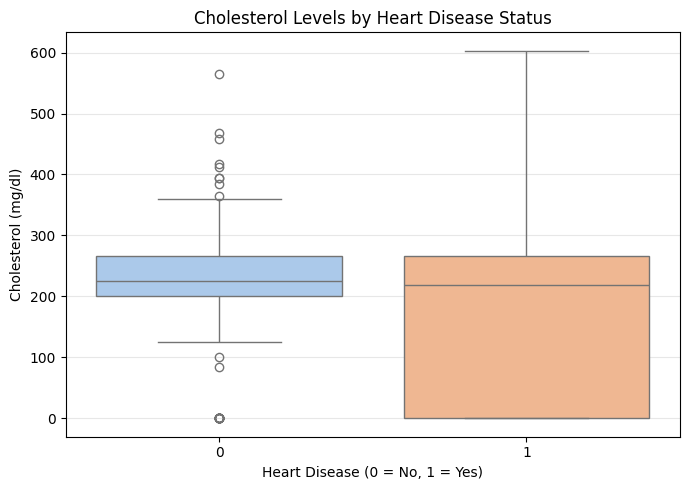

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='disease', y='chol', palette='pastel')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


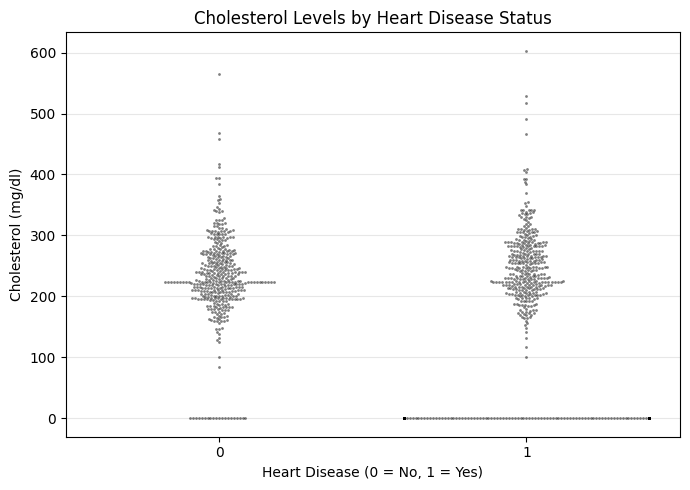

In [15]:
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='disease', y='chol', color='black', alpha=0.5, size=2)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

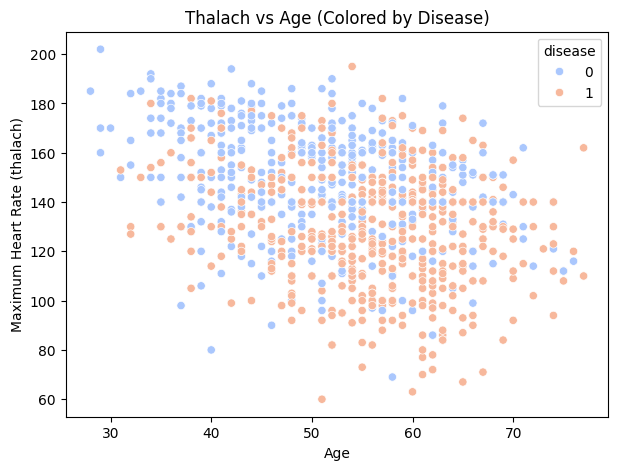

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='age', y='thalch', hue='disease', palette='coolwarm')
plt.title("Thalach vs Age (Colored by Disease)")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.show()

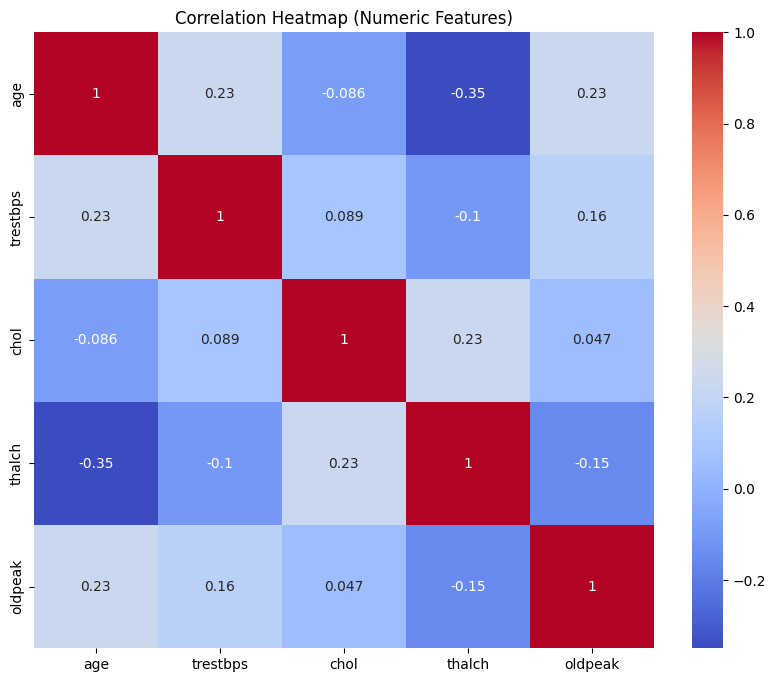

In [17]:
plt.figure(figsize=(10,8))
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**Preparing Features**

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
X = df_encoded.drop(['num','disease', 'id'], axis=1)
y = df_encoded['disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Scaling Features**

In [20]:
#scale the columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Training Models**

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)
print('The accuracy of model is: ')
accuracy_score(y_test, y_pred)

The accuracy of model is: 


0.8315217391304348

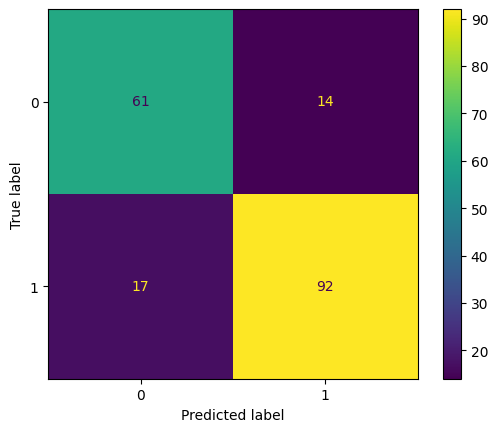

In [24]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

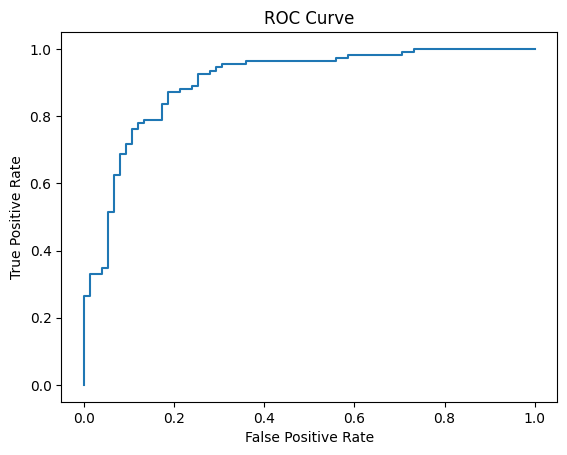

np.float64(0.9028746177370031)

In [26]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_prob)

In [27]:
importance = pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_[0]
}).sort_values(by='coef', ascending=False)

print("Top 10 Features by Coefficient:")
importance.head(10)

Top 10 Features by Coefficient:


,feature,coef
10,dataset_Switzerland,1.301665
6,oldpeak,0.754262
7,ca,0.675265
8,sex_Male,0.565255
11,dataset_VA Long Beach,0.491987
5,exang,0.461289
17,slope_flat,0.388797
9,dataset_Hungary,0.187120
2,chol,0.159558
16,restecg_st-t abnormality,0.090553


In [28]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
y_pred = dt.predict(X_test)
print('The accuracy of model is: ')
accuracy_score(y_test, y_pred)

The accuracy of model is: 


0.8478260869565217

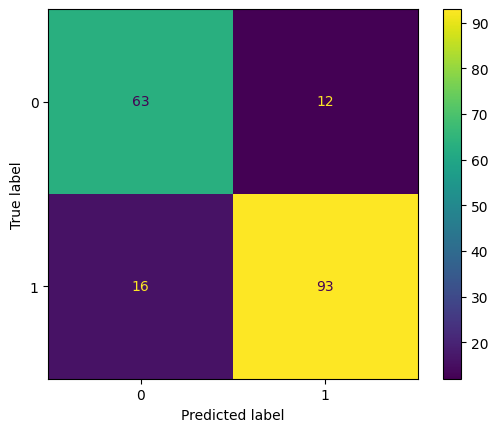

In [30]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

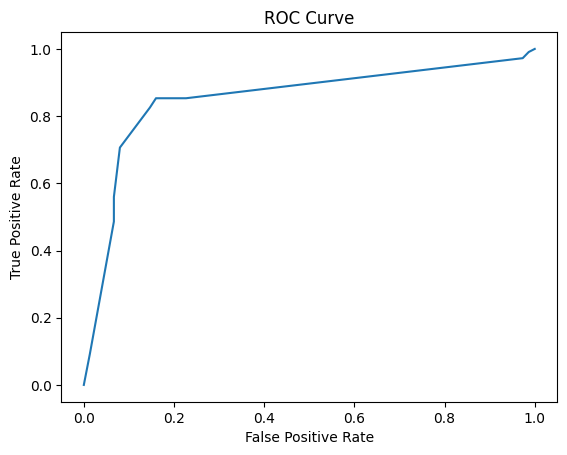

np.float64(0.8515596330275228)

In [31]:
y_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_prob)

In [32]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
print("Top 10 Feature Importances for Decision Tree:")
importances.sort_values(ascending=False).head(10)

Top 10 Feature Importances for Decision Tree:


,0
exang,0.390972
chol,0.210765
dataset_VA Long Beach,0.111335
ca,0.094102
thalch,0.072237
thal_normal,0.043586
oldpeak,0.020290
cp_atypical angina,0.018105
cp_typical angina,0.018100
sex_Male,0.012522
